# Example: Equation of motion (Field Equation)

Let us consider a metric in the form \cite{Thiago}
\begin{equation}
    ds^2=e^{2\gamma(r)} dt^2-e^{2\gamma(r)} dr^2 - e^{2\beta(r)}(d\Sigma^2)
\end{equation}
where
\begin{equation}
    d\Sigma^2=d\theta^2+\sin^2(\theta)d\phi^2
\end{equation}

In [1]:
from GrTiPy import *
init_printing()

In [2]:
d=4
t, r, theta, phi= symbols('t  r theta phi ')
u=np.array([t, r, theta, phi])
n, rho, P, pi, omega=symbols(' n rho P pi omega')
gamma = Function('gamma')(r)
alpha = Function('alpha')(r)
beta = Function('beta')(r)
phi = Function('phi')(r)
g00 =   exp(2*gamma)
g11 =  -exp(2*alpha)
g22 =  -exp(2*beta)
g33 =  -exp(2*beta)*sin(theta)**2
g=np.array([[g00,0,0,0],[0,g11,0,0],\
            [0,0,g22,0],[0,0,0,g33]])
gin=inverse_metric(g)

The Christoffel symbols

In [3]:
for i in range(d):
    for j in range(d):
        for k in range(d):
            if Christoffel_n_ab(d,u,g,gin,i,j,k) !=0:
                print("G(", u[i] ,u[j],u[k], ")="\
                , simplify(Christoffel_n_ab(d,u,g,gin,i,j,k)))

G( t t r )= Derivative(gamma(r), r)
G( t r t )= Derivative(gamma(r), r)
G( r t t )= exp(-2*alpha(r) + 2*gamma(r))*Derivative(gamma(r), r)
G( r r r )= Derivative(alpha(r), r)
G( r theta theta )= -exp(-2*alpha(r) + 2*beta(r))*Derivative(beta(r), r)
G( r phi phi )= -exp(-2*alpha(r) + 2*beta(r))*sin(theta)**2*Derivative(beta(r), r)
G( theta r theta )= Derivative(beta(r), r)
G( theta theta r )= Derivative(beta(r), r)
G( theta phi phi )= -sin(2*theta)/2
G( phi r phi )= Derivative(beta(r), r)
G( phi theta phi )= 1/tan(theta)
G( phi phi r )= Derivative(beta(r), r)
G( phi phi theta )= 1/tan(theta)


Ricci tensor $R^\mu_\nu=g^{\mu\delta} R_{\delta\nu}$ 

In [4]:
def R(d,u,g,gin,a,b):
    sum=0.0
    for i in range(d):
        sum=sum+gin[a][i]*Ricci_Tensor_ab(d,u,g,gin,i,b)
    return sum

$$R^0_0$$

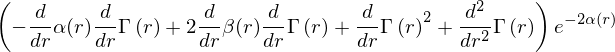

In [5]:
simplify(R(d,u,g,gin,0,0))

$$R^1_1$$

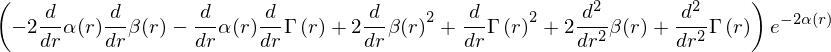

In [6]:
simplify(R(d,u,g,gin,1,1))

$$R^2_2$$

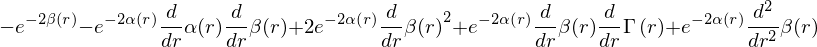

In [7]:
simplify(R(d,u,g,gin,2,2))

$$R^3_3$$

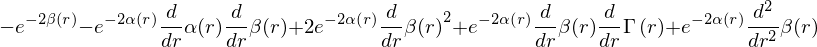

In [8]:
simplify(R(d,u,g,gin,3,3))

the components of the Einstein tensor $G^\mu_\nu=g^{\mu\delta} G_{\delta\nu}$ 

In [16]:
def G(d,u,g,gin,a,b):
    SumG=0.0
    for i in range(d):
        SumG=SumG+gin[a][i]*\
        Einstein_Equation_ab(d,u,g,gin,i,b)
    return SumG

$$G^0_0$$

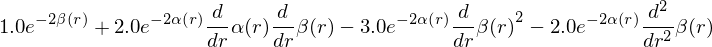

In [17]:
simplify(G(d,u,g,gin,0,0))

$$G^1_1$$

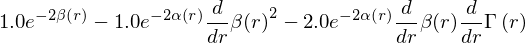

In [18]:
simplify(G(d,u,g,gin,1,1))

$$G^2_2$$

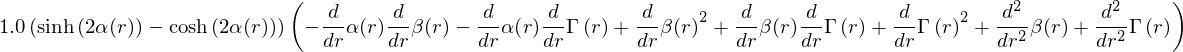

In [19]:
simplify(G(d,u,g,gin,2,2))

$$G^3_3$$

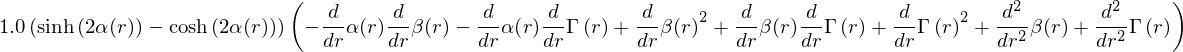

In [25]:
simplify(G(d,u,g,gin,3,3))

Ricci scalr is $$R$$

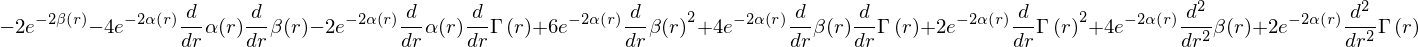

In [15]:
simplify(Ricci_scalar(d,u,g,gin))